In [240]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [247]:
w = torch.tensor([2,-3.4])
len(w)

2

In [260]:
# 生成数据集
def synthetic_data(w,b,num_examples):
    """生成y=Xw+b+噪声"""
    X = torch.normal(0,1,(num_examples,len(w)))
    y = torch.matmul(X,w) + b
    y += torch.normal(0,0.01,y.shape)
    # print(y)
    print(y.reshape(1,-1).shape)
    return X,y.reshape((-1,1))

true_w = torch.tensor([2,-3.4])
true_b = 4.2
features,labels = synthetic_data(true_w,true_b,1000)

torch.Size([1, 1000])


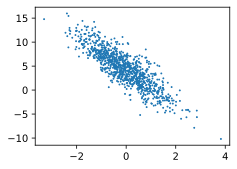

In [250]:
d2l.set_figsize()
d2l.plt.scatter(features[:,(1)].detach().numpy(),labels.detach().numpy(),1)

In [299]:
# 读取批量数据集
def data_iter(batch_size,features,labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices = torch.tensor(
            indices[i:min(i+batch_size,num_examples)]
        )
        yield features[batch_indices],labels[batch_indices]

In [300]:
# 测试读取的批量数据集
batch_size = 10

for X,y in data_iter(batch_size, features,labels):
    print(X,'\n',y)
    break;

tensor([[-0.0241,  1.5702],
        [ 1.0086,  0.2865],
        [ 0.0463, -0.5397],
        [-0.3628,  0.1764],
        [-0.1271,  0.5040],
        [-0.5636, -0.7611],
        [-1.0393,  0.3873],
        [-0.2253, -0.1832],
        [-0.7218,  0.9128],
        [-0.9057,  0.4503]]) 
 tensor([[-1.1906],
        [ 5.2557],
        [ 6.1076],
        [ 2.8685],
        [ 2.2245],
        [ 5.6588],
        [ 0.8142],
        [ 4.3953],
        [-0.3586],
        [ 0.8470]])


In [313]:
# 初始化模型参数
w = torch.zeros((2,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)

In [311]:
# 定义模型
def linerg(X,w,b):
    return torch.matmul(X,w) + b

In [303]:
# 定义损失函数
def squared_loss(y_hat,y):
    # print(y.shape)
    return (y_hat - y)**2/2

In [304]:
# 定义优化算法
def sgd(params,lr,batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [314]:
lr = 0.03
num_epochs = 3
loss = squared_loss
for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l = squared_loss(linerg(X,w,b),y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l = squared_loss(linerg(features,w,b),labels)
        print(f'epoch {epoch + 1},loss {float(train_l.mean()):f}')

epoch 1,loss 0.028619
epoch 2,loss 0.000102
epoch 3,loss 0.000046
